In [19]:
import numpy as np


class BiMax():
    """Method to find all maximal biclusters in a boolean array.
    Attributes
    ----------
    `rows_` : array-like, shape (n_row_clusters, n_rows)
        Results of the clustering. `rows[i, r]` is True if cluster `i`
        contains row `r`. Available only after calling ``fit``.
    `columns_` : array-like, shape (n_column_clusters, n_columns)
        Results of the clustering, like `rows`.
    """

    def fit(self, X):
        """Creates a biclustering for X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        """
        n_rows, n_cols = X.shape
        result = self._conquer(X, set(range(n_rows)),
                               set(range(n_cols)), [])
        row_ind = []
        col_ind = []
        for rows, cols in result:
            ri, ci = self._get_indicators(rows, cols, X.shape)
            row_ind.append(ri)
            col_ind.append(ci)
        self.rows_ = np.vstack(row_ind)
        self.columns_ = np.vstack(col_ind)

    def _conquer(self, data, rows, cols, col_sets):
        if np.all(data[np.array(list(rows))[:, np.newaxis], list(cols)]):
            return [(rows, cols)]
        rows_all, rows_none, rows_some, cols_all, cols_none = \
            self._divide(data, rows, cols, col_sets)
        results_all = []
        results_none = []
        if rows_all:
            results_all = self._conquer(data, rows_all.union(rows_some),
                                        cols_all, col_sets)
        if rows_none and not rows_some:
            results_none = self._conquer(data, rows_none, cols_none, col_sets)
        elif rows_some:
            new_col_sets = col_sets[:]
            new_col_sets.append(cols_none)
            results_none = self._conquer(data,
                                         rows_some.union(rows_none),
                                         cols_all.union(cols_none),
                                         new_col_sets)
        return results_all + results_none

    def _divide(self, data, rows, cols, col_sets):
        new_rows, nz_cols = self._reduce(data, rows, cols, col_sets)
        n_cols = len(cols)
        cols_all = cols
        for r in new_rows:
            if 0 < len(nz_cols[r]) < n_cols:
                cols_all = nz_cols[r]
                break
        cols_none = cols.difference(cols_all)
        rows_all = set()
        rows_none = set()
        rows_some = set()
        for r in new_rows:
            if nz_cols[r].issubset(cols_all):
                rows_all.add(r)
            elif nz_cols[r].issubset(cols_none):
                rows_none.add(r)
            else:
                rows_some.add(r)
        return rows_all, rows_none, rows_some, cols_all, cols_none

    def _reduce(self, data, rows, cols, col_sets):
        row_idxs = np.array(list(rows))
        col_idxs = np.array(list(cols))
        subarray = data[row_idxs[:, np.newaxis], col_idxs]
        nz_cols = {row_idxs[r]: set(col_idxs[np.nonzero(subarray[r])[0]])
                   for r in range(row_idxs.shape[0])}
        new_rows = set(r for r in row_idxs
                       if nz_cols[r] and
                       all(nz_cols[r].intersection(cset)
                           for cset in col_sets))
        return new_rows, nz_cols

    def _get_indicators(self, rows, columns, shape):
        """Convert indices to indicator vectors"""
        row_ind = np.zeros(shape[0], dtype=bool)
        col_ind = np.zeros(shape[1], dtype=bool)
        row_ind[list(rows)] = True
        col_ind[list(columns)] = True
        return row_ind, col_ind

In [20]:
from random import randint
def createBinaryMatrix(m,n):
    M = []
    for i in range(m):
        row = []
        for j in range(n):
            val = randint(0,1)
            row.append(val)

        M.append(row)
    return M

# m is rows and n is columns
m = 20
n = 20
bin_mat = createBinaryMatrix(m,n)

# Print the binary matrix
'''
for row in bin_mat:
    print(row)
'''
arr_bin_mat = np.array(bin_mat)
n_rows, n_cols = arr_bin_mat.shape

print(arr_bin_mat)

model = BiMax()
model.fit(arr_bin_mat)

# get largest bicluster
idx = np.argmax(list(model.rows_[i].sum() * model.columns_[i].sum()
                     for i in range(len(model.rows_))))
bc = np.outer(model.rows_[idx], model.columns_[idx])



[[0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1]
 [1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0]
 [1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0]
 [0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0]
 [0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
 [0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1]
 [1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1]
 [0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1]
 [1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0]
 [1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0]
 [1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0]
 [0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1]
 [1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0]
 [1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0]]


([], [])

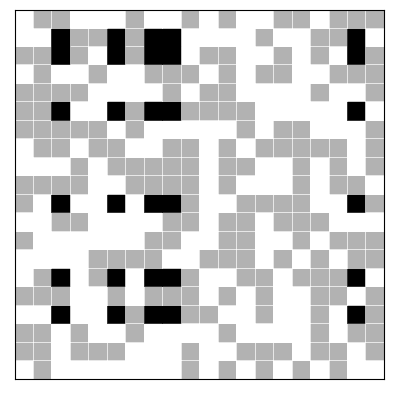

In [26]:
# Taken from the website which implements Bimax

import numpy as np
from matplotlib import pyplot as plt
from bimax import BiMax

generator = np.random.RandomState(1)
data = generator.binomial(1, 0.5, (20, 20))

model = BiMax()
model.fit(data)

# get largest bicluster
idx = np.argmax(list(model.rows_[i].sum() * model.columns_[i].sum()
                     for i in range(len(model.rows_))))
bc = np.outer(model.rows_[idx], model.columns_[idx])

# plot data and overlay largest bicluster
plt.pcolor(data, cmap=plt.cm.Greys, shading='auto')
plt.pcolor(bc, cmap=plt.cm.Greys, alpha=0.7, shading='auto')
plt.axis('scaled')
plt.xticks([])
plt.yticks([])

In [30]:
print(idx)
print(bc[14])

300
[False False  True False False  True False  True  True False False False
 False False False False False False  True False]


In [43]:
# np.outer(model.rows_[idx], model.columns_[idx])
print(model.rows_[idx])
print(model.columns_[idx])

[False False False  True False  True False False False  True False False
 False False  True False False  True  True False]
[False False  True False False  True False  True  True False False False
 False False False False False False  True False]


In [40]:
print(list(model.rows_[i].sum() * model.columns_[i].sum()
                     for i in range(len(model.rows_))))
print(model.rows_[315].sum() * model.columns_[315].sum())

[13, 13, 9, 16, 11, 18, 18, 24, 14, 24, 14, 20, 16, 18, 21, 21, 24, 20, 10, 14, 16, 12, 18, 12, 20, 15, 14, 18, 18, 20, 20, 12, 11, 14, 16, 14, 10, 16, 16, 18, 18, 18, 20, 9, 12, 18, 12, 20, 20, 11, 16, 12, 16, 14, 18, 18, 20, 16, 18, 16, 18, 18, 20, 20, 12, 15, 12, 15, 15, 20, 24, 8, 14, 9, 10, 10, 12, 12, 15, 12, 12, 18, 16, 20, 20, 16, 21, 12, 12, 15, 16, 9, 8, 12, 7, 15, 8, 12, 8, 12, 9, 15, 12, 12, 10, 15, 20, 20, 21, 8, 9, 12, 16, 12, 9, 10, 10, 9, 12, 16, 15, 12, 12, 15, 16, 15, 12, 12, 10, 12, 9, 8, 12, 9, 8, 8, 9, 9, 8, 9, 9, 10, 12, 15, 16, 15, 12, 12, 12, 12, 14, 8, 9, 10, 9, 8, 9, 9, 12, 18, 16, 20, 21, 15, 18, 9, 6, 15, 14, 9, 12, 10, 14, 12, 12, 12, 16, 10, 16, 14, 15, 15, 16, 20, 14, 18, 14, 15, 18, 21, 20, 20, 14, 9, 16, 18, 14, 18, 15, 16, 15, 12, 12, 15, 12, 12, 12, 12, 12, 12, 15, 16, 18, 20, 20, 16, 12, 18, 12, 12, 12, 12, 15, 18, 16, 12, 15, 16, 12, 18, 18, 14, 22, 20, 13, 22, 18, 24, 24, 20, 24, 24, 24, 18, 21, 24, 24, 24, 24, 14, 18, 24, 25, 28, 25, 18, 20, 25, 2

In [47]:
np.shape(model.rows_)

(791, 20)

In [48]:
np.shape(model.columns_)

(791, 20)